In [1]:
!git clone https://github.com/swapniel99/ezio.git

Cloning into 'ezio'...
remote: Enumerating objects: 184, done.
remote: Counting objects: 100% (184/184), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 184 (delta 65), reused 101 (delta 22), pack-reused 0
Receiving objects: 100% (184/184), 1007.14 KiB | 22.38 MiB/s, done.
Resolving deltas: 100% (65/65), done.


In [2]:
%cd ezio

/content/ezio


In [3]:
import torch
# import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm
import torchvision.transforms as transforms

!pip install torchsummary
from torchsummary import summary

from ezio.data import dataset 
from ezio.model.session_7 import model as model_arch
from ezio.runner import engine
from ezio.utils import loss

In [4]:
## Create train and test transforms
train_transforms = transforms.Compose(
    [transforms.RandomAffine(7, (0.1, 0.1), (0.9, 1.1), 7),
     transforms.RandomHorizontalFlip(p=0.5),
     transforms.ToTensor(),
     transforms.Normalize((0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784))])

test_transforms = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.49139968, 0.48215841, 0.44653091), (0.24703223, 0.24348513, 0.26158784))])

In [5]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [6]:
train_set, valid_set = dataset.cifar10_dataset(train_transforms, test_transforms)

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


In [7]:
train_loader, valid_loader = dataset.create_loaders(train_set, valid_set, train_batch_size=32, valid_batch_size=32, num_workers=4)

In [13]:
from ezio.model.session_7.model import Net_7
model = Net_7().to(device)

In [14]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 30, 30]           3,456
       BatchNorm2d-2          [-1, 128, 30, 30]             256
              ReLU-3          [-1, 128, 30, 30]               0
            Conv2d-4          [-1, 128, 28, 28]         147,456
       BatchNorm2d-5          [-1, 128, 28, 28]             256
              ReLU-6          [-1, 128, 28, 28]               0
         MaxPool2d-7          [-1, 128, 14, 14]               0
            Conv2d-8          [-1, 128, 14, 14]           1,152
            Conv2d-9          [-1, 256, 14, 14]          32,768
      BatchNorm2d-10          [-1, 256, 14, 14]             512
             ReLU-11          [-1, 256, 14, 14]               0
           Conv2d-12          [-1, 256, 14, 14]           2,304
           Conv2d-13          [-1, 256, 14, 14]          65,536
      BatchNorm2d-14          [-1, 256,

In [15]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.5)
loss_function = loss.cross_entropy_loss()

In [16]:
train_acc, train_losses, test_acc, test_losses = engine.fit(model, train_loader, valid_loader, loss_function, device, optimizer, 20, scheduler)

  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.6646416187286377 Batch_id=1562 Accuracy=44.00: 100%|██████████| 1563/1563 [00:30<00:00, 52.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0380, Accuracy: 5896/10000 (58.96%)

EPOCH: 2


Loss=0.7993495464324951 Batch_id=1562 Accuracy=61.00: 100%|██████████| 1563/1563 [00:29<00:00, 53.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0282, Accuracy: 6874/10000 (68.74%)

EPOCH: 3


Loss=1.3293330669403076 Batch_id=1562 Accuracy=68.00: 100%|██████████| 1563/1563 [00:30<00:00, 52.06it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0254, Accuracy: 7164/10000 (71.64%)

EPOCH: 4


Loss=0.7139858603477478 Batch_id=1562 Accuracy=71.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.90it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0213, Accuracy: 7651/10000 (76.51%)

EPOCH: 5


Loss=0.6780822277069092 Batch_id=1562 Accuracy=74.00: 100%|██████████| 1563/1563 [00:29<00:00, 52.15it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0208, Accuracy: 7760/10000 (77.60%)

EPOCH: 6


Loss=0.46292710304260254 Batch_id=1562 Accuracy=76.00: 100%|██████████| 1563/1563 [00:30<00:00, 50.77it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0207, Accuracy: 7789/10000 (77.89%)

EPOCH: 7


Loss=1.0910906791687012 Batch_id=1562 Accuracy=77.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.79it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0176, Accuracy: 8083/10000 (80.83%)

EPOCH: 8


Loss=0.36207878589630127 Batch_id=1562 Accuracy=79.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.61it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0169, Accuracy: 8135/10000 (81.35%)

EPOCH: 9


Loss=0.6073153614997864 Batch_id=1562 Accuracy=80.00: 100%|██████████| 1563/1563 [00:29<00:00, 52.32it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0162, Accuracy: 8249/10000 (82.49%)

EPOCH: 10


Loss=0.329245388507843 Batch_id=1562 Accuracy=81.00: 100%|██████████| 1563/1563 [00:29<00:00, 52.34it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0157, Accuracy: 8317/10000 (83.17%)

EPOCH: 11


Loss=0.454102098941803 Batch_id=1562 Accuracy=82.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.98it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0161, Accuracy: 8246/10000 (82.46%)

Epoch    11: reducing learning rate of group 0 to 5.0000e-03.
EPOCH: 12


Loss=0.2989058196544647 Batch_id=1562 Accuracy=85.00: 100%|██████████| 1563/1563 [00:29<00:00, 52.42it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0132, Accuracy: 8558/10000 (85.58%)

EPOCH: 13


Loss=0.6223427057266235 Batch_id=1562 Accuracy=85.00: 100%|██████████| 1563/1563 [00:29<00:00, 52.82it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0132, Accuracy: 8566/10000 (85.66%)

EPOCH: 14


Loss=0.6976563930511475 Batch_id=1562 Accuracy=86.00: 100%|██████████| 1563/1563 [00:30<00:00, 50.60it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 8577/10000 (85.77%)

EPOCH: 15


Loss=0.8935694098472595 Batch_id=1562 Accuracy=86.00: 100%|██████████| 1563/1563 [00:31<00:00, 49.45it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0133, Accuracy: 8583/10000 (85.83%)

Epoch    15: reducing learning rate of group 0 to 2.5000e-03.
EPOCH: 16


Loss=0.13562002778053284 Batch_id=1562 Accuracy=88.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.61it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 8728/10000 (87.28%)

EPOCH: 17


Loss=0.7307717800140381 Batch_id=1562 Accuracy=89.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.67it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0120, Accuracy: 8713/10000 (87.13%)

EPOCH: 18


Loss=0.6269345879554749 Batch_id=1562 Accuracy=89.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.15it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0121, Accuracy: 8719/10000 (87.19%)

Epoch    18: reducing learning rate of group 0 to 1.2500e-03.
EPOCH: 19


Loss=0.6597343683242798 Batch_id=1562 Accuracy=90.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.02it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 8758/10000 (87.58%)

EPOCH: 20


Loss=0.4813401699066162 Batch_id=1562 Accuracy=90.00: 100%|██████████| 1563/1563 [00:30<00:00, 51.01it/s]



Test set: Average loss: 0.0117, Accuracy: 8735/10000 (87.35%)



[[<matplotlib.axes._subplots.AxesSubplot object at 0x7f815e273cc0>


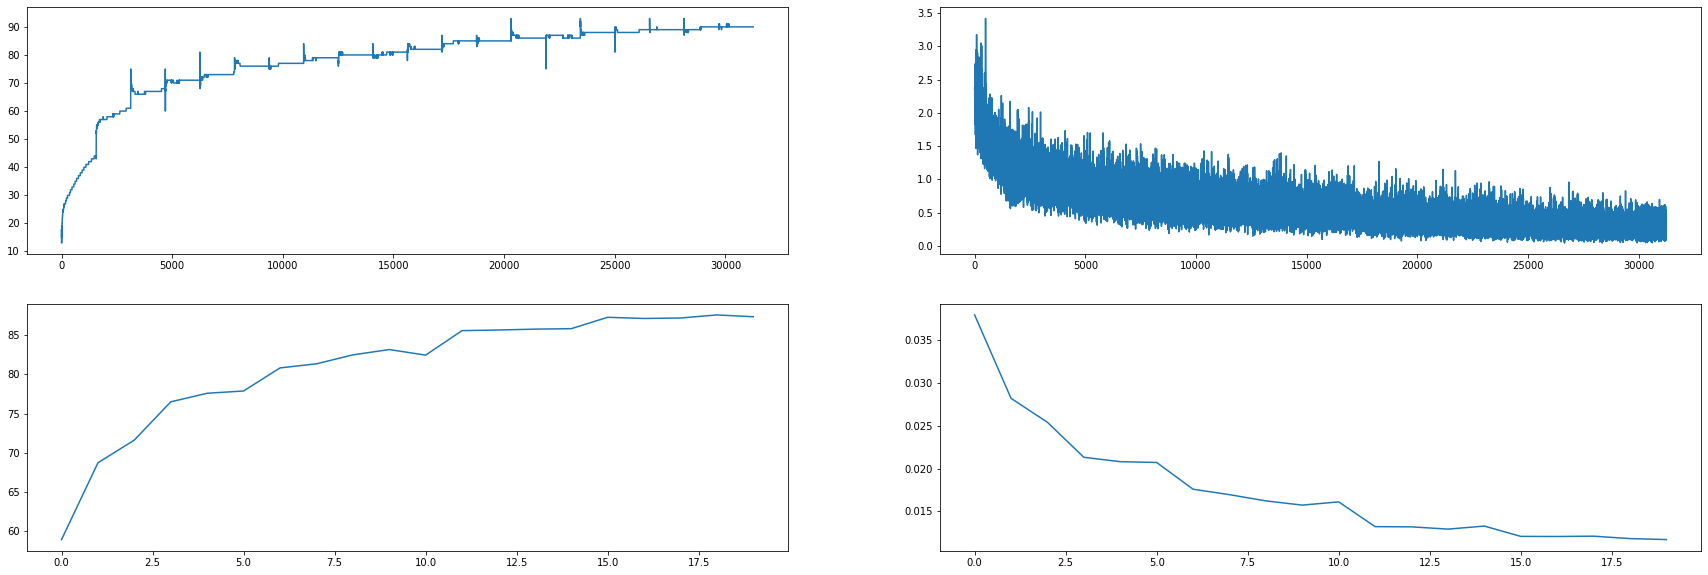

In [17]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(30,10))
print(axs)
axs[0][0].plot(train_acc, label = "train_acc")
axs[0][1].plot(train_losses, label = "train_losses")
axs[1][0].plot(test_acc, label = "test_acc")
axs[1][1].plot(test_losses, label = "test_losses")
# axs[0].legend()
# axs[0].set_title("Training Loss")